# Introduction

The problem under investigation is that we're trying to predict the enrollment statuses of school admission requests given some information about the student and their parents, including their income level, job title, bank account balance, ..etc. Accordingly, we believe that the problem we're tackling is a classification problem for which the independant variables are the sutdent's information and the response variable is whether or not they will be enrolled. To define the most contributing factors, we shall start by doing some descriptive analytics and feature engineering on the features that we believe are of high importance (given the domain knowledge). Following that, we shall build a set of binary classifiers to compare and contrast their results, and to better learn the feature importance given the algorithm(s) performance.

## Importing Necessary Packages

First, we'll start by importing the necessary packages we're going to use for our descriptive and predictive analytics.

In [ ]:
import zipfile
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.metrics import silhouette_score,silhouette_samples

In [ ]:
#make wider graphs
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

<Figure size 864x360 with 0 Axes>

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing Data

Now, let's start by reading the data from the csv files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Hadeel Mabrouk - 900163213 /Hackathon 2/train_International-School-Dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Mohammed Abuelwafa - 900172603/Hackathon 2/train_International-School-Dataset.csv")

In [ ]:
df.shape

(34000, 26)

In [ ]:
df.head()

,app_id,job_name,job_exp_yrs,address,house_type,annual_salary,salary_verification,n_semesters,prev_grade_percent,year,fees/income,down_pymnt,fees,spouse_has_job,total_balance,payment_method,num_children,credit_limit,credit_limit_ex_mort,spouse_income,spouse_fees/income,spouse_income_verification,decision,mental_iv_score,parent_iv_score,social_iv_score
0,126229306,Assistant,1.0,YUU,rental,46000.0,V,1,92.65,2017,17.48,0.0,40000.0,Yes,35198.0,credit,3,68039.0,35198.0,110750.0,27.97,V,not enrolled,0.087638,8.423544,32.629941
1,76692947,Nurse,1.0,YUU,rental,152000.0,V,1,93.51,2016,2.39,16000.0,20000.0,No,11704.0,credit,5,24000.0,11704.0,NaN,NaN,NaN,enrolled,25.328459,12.940269,21.888056
2,60624620,engineer,5.0,NXT,rental,115000.0,V,2,88.47,2015,12.95,16000.0,20000.0,No,41004.0,credit,5,67122.0,41004.0,NaN,NaN,NaN,enrolled,7.141356,7.539012,20.730058
3,129161039,manager,2.0,YDC,rental,25000.0,NV,1,89.58,2018,9.75,0.0,20000.0,No,4065.0,credit,2,12000.0,4065.0,NaN,NaN,NaN,not enrolled,34.474615,22.732014,1.076913
4,90518461,Other,6.0,LJM,mortgage,80000.0,V,1,78.51,2016,15.17,21960.0,27450.0,No,169079.0,credit,2,211158.0,32595.0,NaN,NaN,NaN,enrolled,29.070282,5.226745,13.420388


In [ ]:
df.describe()

,app_id,job_exp_yrs,annual_salary,n_semesters,prev_grade_percent,year,fees/income,down_pymnt,fees,total_balance,num_children,credit_limit,credit_limit_ex_mort,spouse_income,spouse_fees/income,mental_iv_score,parent_iv_score,social_iv_score
count,3.400000e+04,34000.000000,3.400000e+04,34000.000000,34000.000000,34000.000000,33997.000000,34000.000000,34000.000000,3.400000e+04,34000.000000,3.400000e+04,34000.000000,1294.000000,1294.000000,34000.000000,34000.000000,34000.000000
mean,6.131298e+07,4.079294,9.820583e+04,1.430647,85.424298,2015.244735,15.538769,12163.304118,25950.638235,1.577643e+05,3.128441,1.970130e+05,43389.425441,125014.670889,17.476236,20.843090,20.887305,21.022355
std,3.771724e+07,2.606378,7.353028e+04,0.495174,5.407398,1.401055,10.217856,10707.437714,5468.639711,1.834909e+05,1.481278,2.013486e+05,35935.186485,58939.673848,7.327846,16.648062,16.696663,16.792907
min,4.058310e+05,1.000000,0.000000e+00,1.000000,69.010000,2012.000000,0.000000,0.000000,20000.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,40000.000000,0.230000,0.000667,0.000027,0.000666
25%,3.089923e+07,2.000000,6.500000e+04,1.000000,82.140000,2014.000000,9.510000,0.000000,21000.000000,3.195675e+04,2.000000,5.696950e+04,23465.250000,87500.000000,12.037500,7.406833,7.395480,7.485895
50%,6.173726e+07,4.000000,8.500000e+04,1.000000,86.010000,2015.000000,14.540000,16000.000000,24950.000000,7.143400e+04,3.000000,1.158680e+05,36382.000000,110250.000000,17.110000,16.886263,16.937863,16.980574
75%,8.847571e+07,6.000000,1.150000e+05,2.000000,89.250000,2016.000000,20.410000,20000.000000,30000.000000,2.389780e+05,4.000000,2.863752e+05,53274.000000,148000.000000,22.435000,30.683819,30.723531,30.929671
max,1.459724e+08,9.000000,7.446395e+06,2.000000,94.690000,2018.000000,740.960000,32000.000000,40000.000000,4.772549e+06,5.000000,4.932524e+06,897835.000000,642000.000000,39.900000,87.851114,88.246603,88.873714


Now, let's see if there exists duplicates in the dataset to be excluded.

In [ ]:
df.duplicated().value_counts()

False    34000
dtype: int64

Now, we can confidently conclude that the given dataset has no duplicates.

# Data Exploration

## Exploring Categorical Variables

We'll start by defining which variables are categorical to start with.

In [ ]:
object_dtypes = df.select_dtypes('object')
print(object_dtypes.head())

object_columns = object_dtypes.columns

    job_name address house_type salary_verification spouse_has_job  \
0  Assistant     YUU     rental                   V            Yes   
1      Nurse     YUU     rental                   V             No   
2   engineer     NXT     rental                   V             No   
3    manager     YDC     rental                  NV             No   
4      Other     LJM   mortgage                   V             No   

  payment_method spouse_income_verification      decision  
0         credit                          V  not enrolled  
1         credit                        NaN      enrolled  
2         credit                        NaN      enrolled  
3         credit                        NaN  not enrolled  
4         credit                        NaN      enrolled  


Now, let's investigate the distribution of each of the given categorical data columns.

In [ ]:
df['n_semesters'].value_counts()  # categorical Variable 

1    19358
2    14642
Name: n_semesters, dtype: int64

In [ ]:
df['spouse_has_job'].value_counts()

No     32706
Yes     1294
Name: spouse_has_job, dtype: int64

To better visualize the data, let's plot a pie chart representing the percentage of each category.




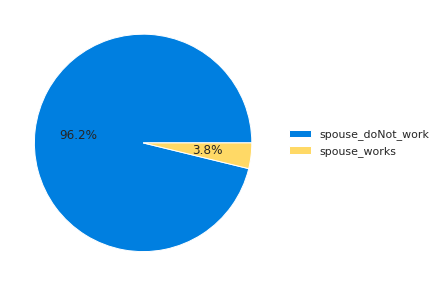

In [ ]:
labels = ['spouse_doNot_work' , 'spouse_works']
plt.pie(df['spouse_has_job'].value_counts(),colors = ['#007fe0','#ffd966','#57b6ff','#ed893e'],autopct='%1.1f%%')
plt.legend(labels, loc='center left',bbox_to_anchor=(1.0, 0.5))

Similar to the previous feature, we'll apply the same analytics on some other categorical data as well.

In [ ]:
df['spouse_income_verification'].value_counts()

NV     629
VbP    381
V      273
Name: spouse_income_verification, dtype: int64

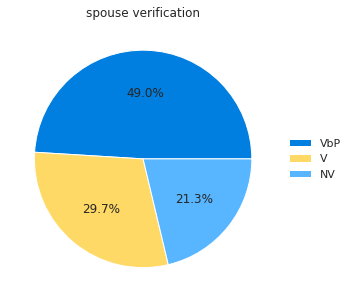

In [ ]:
labels = ['VbP' , 'V', 'NV']
plt.pie(df['spouse_income_verification'].value_counts(),colors = ['#007fe0','#ffd966','#57b6ff','#ed893e'],autopct='%1.1f%%')
plt.title("spouse verification")
plt.legend(labels, loc='center left',bbox_to_anchor=(1.0, 0.5))

In [ ]:
sum(df['spouse_income_verification'].value_counts())

1283

In [ ]:
df['salary_verification'].value_counts()

VbP    15601
V      13512
NV      4887
Name: salary_verification, dtype: int64

In [ ]:
df['job_name'].value_counts()

manager             6285
Other               3960
Director            1740
engineer            1518
sales               1258
Owner               1075
Analyst              989
driver               887
President            774
Nurse                745
Supervisor           725
Specialist           606
Consultant           563
Assistant            554
Technician           521
Officer              505
Tech                 492
Administrator        413
Finance              400
Operator             396
teacher              376
Lead                 375
Coordinator          353
Developer            338
Court                310
Associate            286
accountant           283
police               268
Bank                 215
programmer           214
Mechanic             211
Marketing            200
Medical              188
designer             159
therapist            156
electrician          152
instructor           131
Chef                 109
Auditor               87
Customer Service      86


In [ ]:
len(df['job_name'].value_counts())

80

From the previous cell, we can infer that there exists too many categories in the 'job_name' column. Hence, if we are to use it as a feature for the predictive model, we shall need to find a way to cluster the categories into smaller group. 

We also tried to look up the interpretation of the location to learn if we can cluster them into smaller groups to include them in the classifier aftewards. However, we couldn't find relevant information upon doing more research.

In [ ]:
df['address'].value_counts()

YUU    6615
SSK    3522
UWH    2622
XSO    2452
HLY    1728
MNX    1430
OZO    1088
DZG     980
RQX     976
TBA     929
SCE     879
LLA     856
UIG     770
OPU     748
LJM     723
EFB     707
HML     652
CAA     572
VZM     517
NMY     490
AMB     397
KTT     356
VVT     354
NXT     350
HYU     325
YDC     272
HIA     263
VLE     256
ARB     189
LDS     180
EZT     178
BHO     163
MBJ     159
SSR     158
DZY     128
XJK     126
PRQ     110
TNK     107
HXD      87
GDV      84
NHI      76
HRY      73
TGZ      64
CPK      60
XQR      54
TVM      44
QQB      36
MAK      36
AEJ      32
FUL      27
Name: address, dtype: int64

In [ ]:
len(df['address'].value_counts())

50

In [ ]:
df['house_type'].value_counts()

mortgage    16693
rental      13762
owned        3538
Name: house_type, dtype: int64

In [ ]:
house_type_counts = df['house_type'].value_counts()

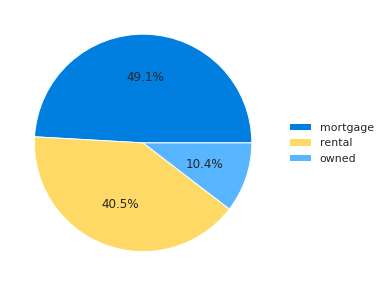

In [ ]:
labels = ['mortgage' , 'rental', 'owned']
plt.pie(house_type_counts,colors = ['#007fe0','#ffd966','#57b6ff','#ed893e'],autopct='%1.1f%%')
plt.legend(labels, loc='center left',bbox_to_anchor=(1.0, 0.5))


In [ ]:
salary_verification_counts = df['salary_verification'].value_counts()

In [ ]:
salary_verification_counts

VbP    15601
V      13512
NV      4887
Name: salary_verification, dtype: int64

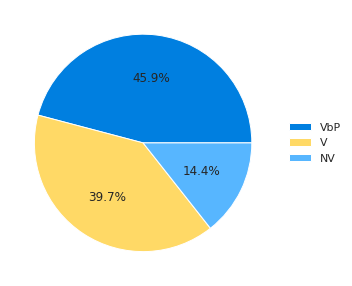

In [ ]:
labels = ['VbP' , 'V', 'NV']
plt.pie(salary_verification_counts,colors = ['#007fe0','#ffd966','#57b6ff','#ed893e'],autopct='%1.1f%%')
plt.legend(labels, loc='center left',bbox_to_anchor=(1.0, 0.5))

In [ ]:
df['salary_verification'].value_counts()

VbP    15601
V      13512
NV      4887
Name: salary_verification, dtype: int64

In [ ]:
df['payment_method'].value_counts()

credit    33857
cash        143
Name: payment_method, dtype: int64

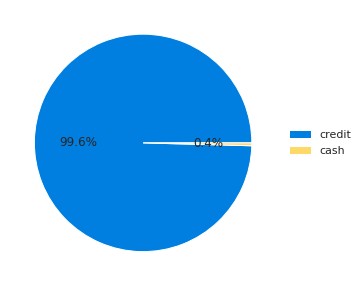

In [ ]:
labels = ['credit' , 'cash']
plt.pie(df['payment_method'].value_counts(),colors = ['#007fe0','#ffd966','#57b6ff','#ed893e'],autopct='%1.1f%%')
plt.legend(labels, loc='center left',bbox_to_anchor=(1.0, 0.5))

From the previous pie chart, we can notice that the most prominent method of payment is credit card (>99%).

Now, let's check the response variable under investigation to see if there exists data imbalance.

In [ ]:
df['decision'].value_counts()

enrolled        20000
not enrolled    14000
Name: decision, dtype: int64

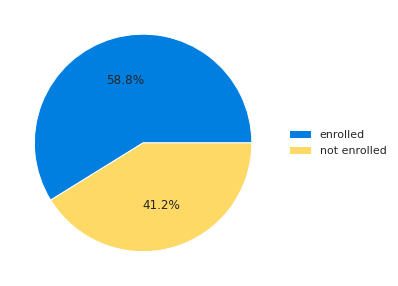

In [ ]:
labels = ['enrolled' , 'not enrolled']
plt.pie(df['decision'].value_counts(),colors = ['#007fe0','#ffd966','#57b6ff','#ed893e'],autopct='%1.1f%%')
plt.legend(labels, loc='center left',bbox_to_anchor=(1.0, 0.5))

From the pie chart above, we can conclude that there's no data imbalance given the close percentage of both classes.

## Exploring Numerical Variables




Again, let's start by defining the numerical variables in the given dataset.

In [ ]:
numerical = ['float64' , 'int64']
numerical_dtypes = df.select_dtypes(numerical)
numerical_columns = numerical_dtypes.columns

numerical_columns

Index(['app_id', 'job_exp_yrs', 'annual_salary', 'n_semesters',
       'prev_grade_percent', 'year', 'fees/income', 'down_pymnt', 'fees',
       'total_balance', 'num_children', 'credit_limit', 'credit_limit_ex_mort',
       'spouse_income', 'spouse_fees/income', 'mental_iv_score',
       'parent_iv_score', 'social_iv_score'],
      dtype='object')

Now, let's plot the histograms and/or the boxplot of each variable to better learn about the distribution of each, and check if there exists outliers and any of the numerical variables.

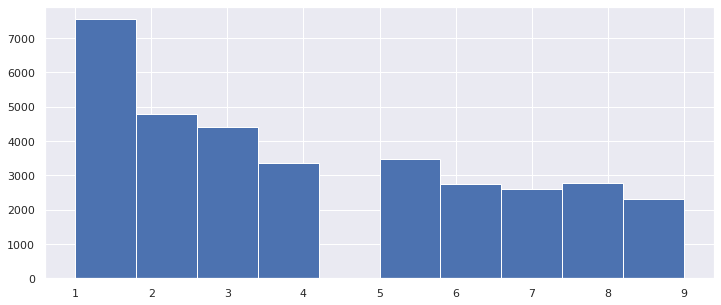

In [ ]:
df['job_exp_yrs'].hist()

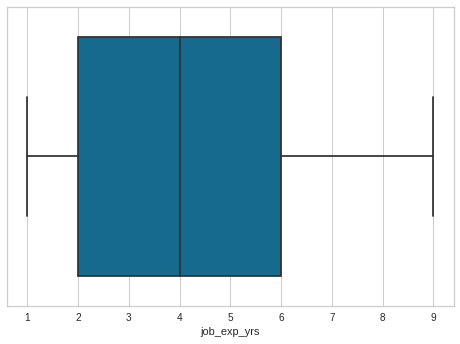

In [ ]:
ax = sns.boxplot(x=df['job_exp_yrs'])

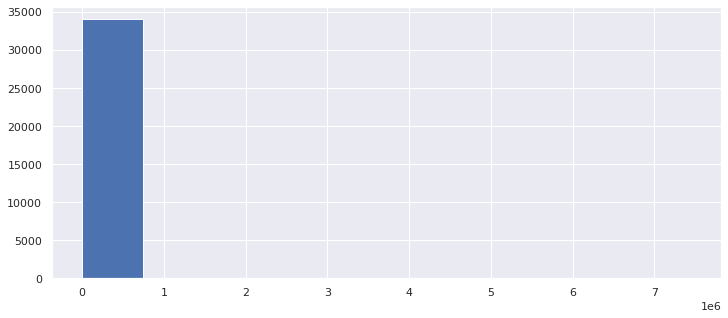

In [ ]:
df['annual_salary'].hist()

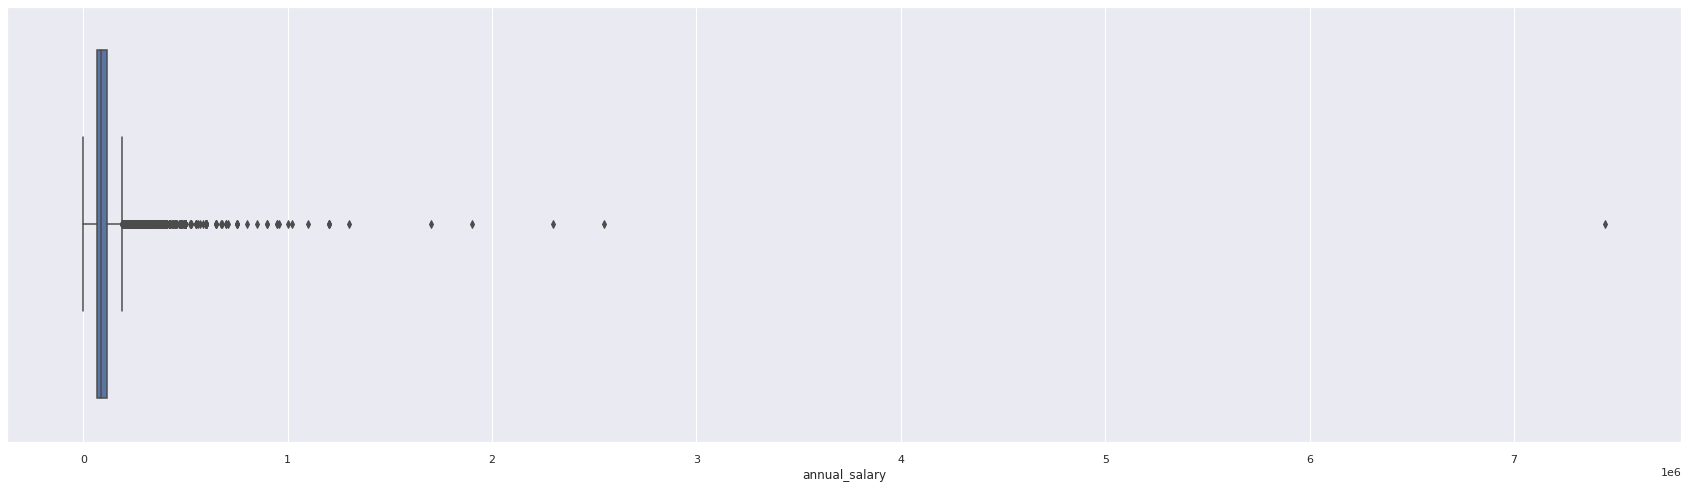

In [ ]:
sns.set(rc={"figure.figsize":(30, 8)})
ax = sns.boxplot(x=df['annual_salary'])

From the graphs above, we can infer that the majority of annual salaries are below 1M units. So, let's see how the data shall look like if we excluded entries of annual salary >1M.

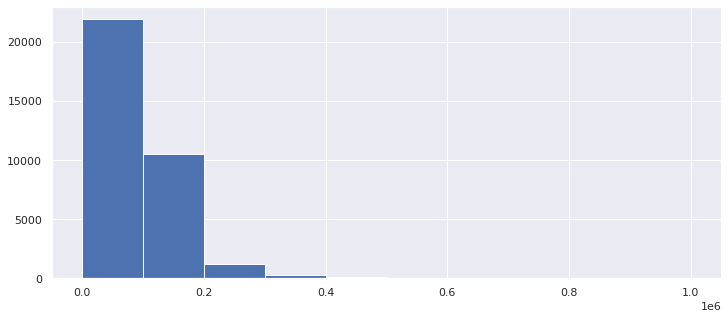

In [ ]:
df['annual_salary'][df['annual_salary']<=1000000].hist()

Here are the outliers for the annual salary column.

In [ ]:
df['annual_salary'][df['annual_salary']>=1000000]


3944     1200000.0
4109     1900000.0
7065     1020000.0
10933    1700000.0
12531    1200000.0
15117    7446395.0
18435    1100000.0
19852    2300000.0
20590    1200000.0
23777    1000000.0
24237    2548000.0
26054    1300000.0
Name: annual_salary, dtype: float64

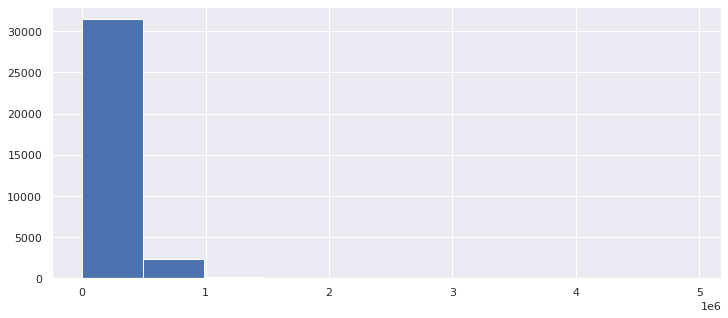

In [ ]:
df['credit_limit'].hist()

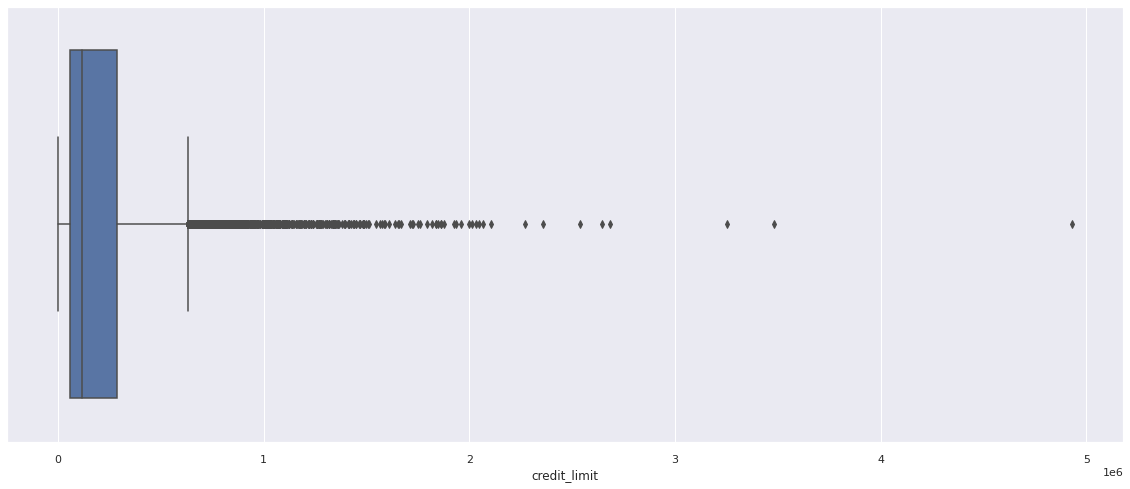

In [ ]:
ax = sns.boxplot(x=df['credit_limit'])

Similar to the annual salary variable, it seems that there exists a long tail for the credit limit variable as well. Let's see how many entries are there with credit limit >2M units.

In [ ]:
df['credit_limit'][df['credit_limit']>=2000000].count()


13

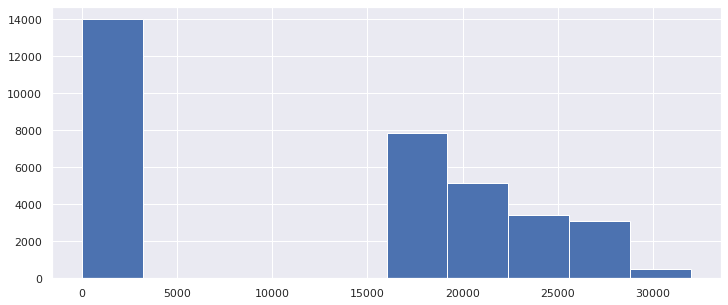

In [ ]:
df['down_pymnt'].hist()

**Important:** we noticed that the 'down_payment' column only has a non-zero value if the applicant got accepted, meaning that it serves as a leakage variable, and hence we decided to exclude it.

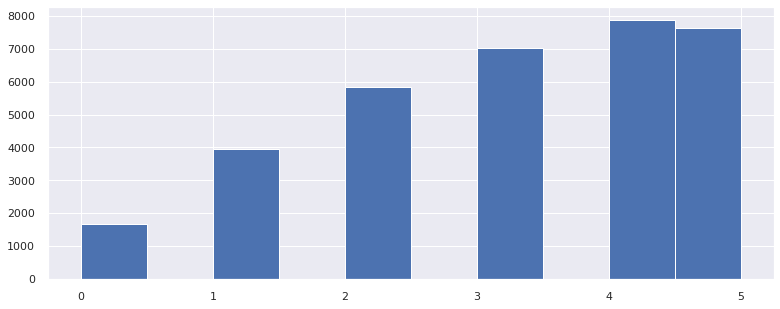

In [ ]:
sns.set(rc={"figure.figsize":(13, 5)})
df['num_children'].hist()

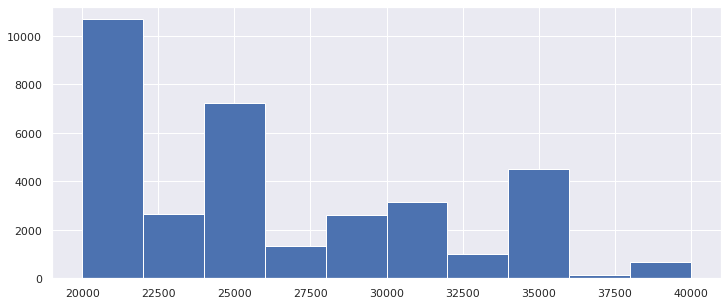

In [ ]:
df['fees'].hist()

Now, let's plot the histogram of the fees irrespective of the #semesters.

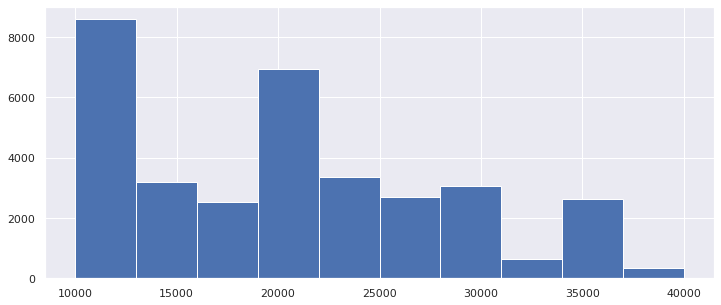

In [ ]:
(df['fees']/df['n_semesters']).hist()

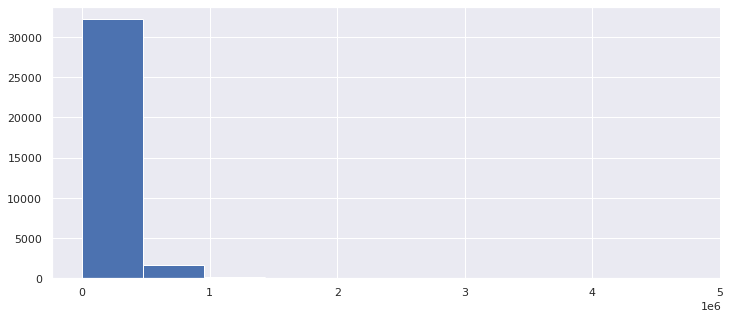

In [ ]:
df['total_balance'].hist()

Again, the total balance is similar to annual salary with respect to outliers. 

In [ ]:
df['total_balance'][df['total_balance']>=1000000].count()


155

Also, we tried to invistigate the meaning of the 'fees/income' column. In the columns description, it's mentioned that it is the ratio of school fees to the applicant's whole income. However, when we divide the fees over the annual salary it results in majorly different numbers. To further invistigate the meaning of the column to learn why this might be happening, we plotted the heatmap across the variables that we think might be related to the ratio. Surprisingly, we found that the ratios are highly correlated to the credit cards limit excluding the mortgage deductions. On the contrary, it's less correlated to the applicants annual salary.

In [ ]:
df[df['fees/income'] == max(df['fees/income'])]

,app_id,job_name,job_exp_yrs,address,house_type,annual_salary,salary_verification,n_semesters,prev_grade_percent,year,fees/income,down_pymnt,fees,spouse_has_job,total_balance,payment_method,num_children,credit_limit,credit_limit_ex_mort,spouse_income,spouse_fees/income,spouse_income_verification,decision,mental_iv_score,parent_iv_score,social_iv_score,decision_encoded,total_income,total_income_per_child
22142,126685079,Owner,6.0,XSO,mortgage,1000.0,NV,2,74.18,2017,740.96,16000.0,20000.0,Yes,33483.0,credit,4,45660.0,33483.0,121000.0,12.28,NV,enrolled,23.178644,14.056872,17.54462,0,122000.0,24400.0


In [ ]:
df[df['fees/income'] == min(df['fees/income'])]

,app_id,job_name,job_exp_yrs,address,house_type,annual_salary,salary_verification,n_semesters,prev_grade_percent,year,fees/income,down_pymnt,fees,spouse_has_job,total_balance,payment_method,num_children,credit_limit,credit_limit_ex_mort,spouse_income,spouse_fees/income,spouse_income_verification,decision,mental_iv_score,parent_iv_score,social_iv_score,decision_encoded,total_income,total_income_per_child
1113,135057333,Dental,4.0,OZO,rental,110000.0,V,2,82.53,2018,0.0,0.0,35000.0,No,0.0,credit,0,81100.0,0.0,0.0,NaN,NaN,not enrolled,15.422853,46.834718,2.862601,1,110000.0,110000.000000
1177,15878963,NaN,1.0,UWH,rental,60000.0,V,1,84.39,2014,0.0,19120.0,23900.0,No,0.0,credit,5,0.0,0.0,0.0,NaN,NaN,enrolled,20.250793,4.800223,35.726945,0,60000.0,10000.000000
1217,125128091,scientist,4.0,DZG,mortgage,102000.0,VbP,2,90.56,2017,0.0,16000.0,20000.0,No,543697.0,credit,3,575993.0,0.0,0.0,NaN,NaN,enrolled,23.588341,4.065869,0.473291,0,102000.0,25500.000000
1262,118209938,President,1.0,AMB,owned,25000.0,NV,1,85.92,2017,0.0,0.0,20000.0,Yes,0.0,credit,3,1000.0,0.0,95000.0,16.81,NV,not enrolled,58.940270,9.936655,21.123075,1,120000.0,30000.000000
3918,41828791,Medical,2.0,XSO,mortgage,65000.0,V,1,90.83,2015,0.0,24000.0,30000.0,No,141045.0,credit,5,176700.0,0.0,0.0,NaN,NaN,enrolled,37.316029,5.662069,21.333938,0,65000.0,10833.333333
4641,127566375,manager,1.0,HLY,rental,82500.0,NV,1,78.55,2018,0.0,16000.0,20000.0,No,0.0,credit,2,0.0,0.0,0.0,NaN,NaN,enrolled,2.377932,30.725037,52.867614,0,82500.0,27500.000000
6525,132783815,Finance,1.0,TBA,rental,20000.0,VbP,2,82.53,2018,0.0,16000.0,20000.0,No,0.0,credit,0,12900.0,0.0,0.0,NaN,NaN,enrolled,36.645430,4.517283,20.876215,0,20000.0,20000.000000
7646,94067540,Consultant,5.0,YUU,mortgage,100000.0,V,2,88.56,2016,0.0,28000.0,35000.0,No,159447.0,credit,3,211100.0,0.0,0.0,NaN,NaN,enrolled,26.805838,11.833440,15.932284,0,100000.0,25000.000000
9298,80203807,Owner,4.0,MNX,mortgage,55000.0,VbP,1,90.84,2016,0.0,0.0,20000.0,No,0.0,credit,3,12900.0,0.0,0.0,NaN,NaN,not enrolled,0.613262,22.867093,16.283505,1,55000.0,13750.000000
10091,138511501,manager,1.0,YUU,mortgage,90000.0,VbP,2,92.16,2018,0.0,22400.0,28000.0,No,344500.0,credit,2,400600.0,0.0,0.0,NaN,NaN,enrolled,37.684553,16.668174,0.159648,0,90000.0,30000.000000


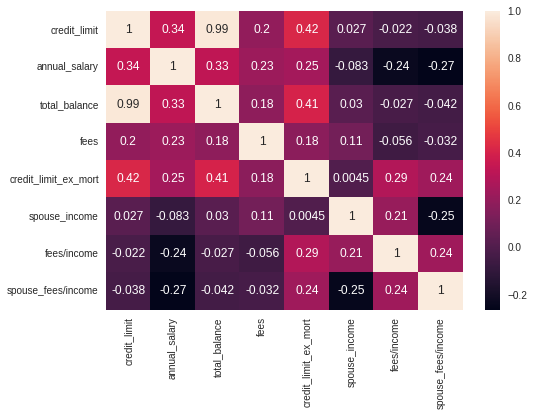

In [ ]:
columns = ['credit_limit' , 'annual_salary' , 'total_balance' , 'fees' , 'credit_limit_ex_mort' , 'spouse_income' , 'fees/income' , 'spouse_fees/income']
df_small = df[columns]
correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

## Exploring the IV Scores 


Additionally, we wanted to invistigate if there's a correlation between the IV scores and the decision regarding the applicant's acceptance. 

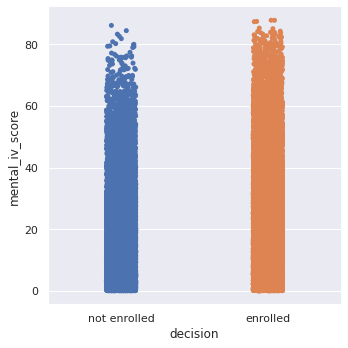

In [ ]:
sns.catplot(x="decision", y="mental_iv_score", data=df)

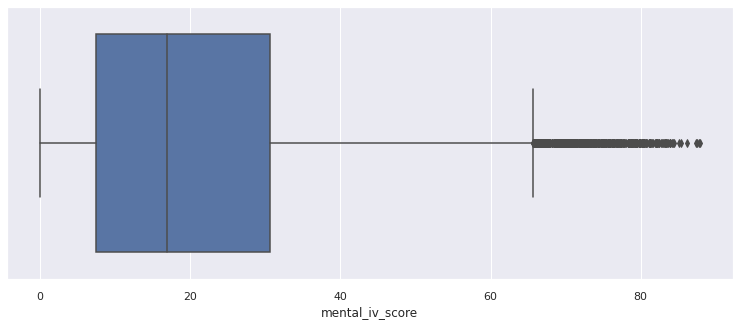

In [ ]:
ax = sns.boxplot(x=df['mental_iv_score'])

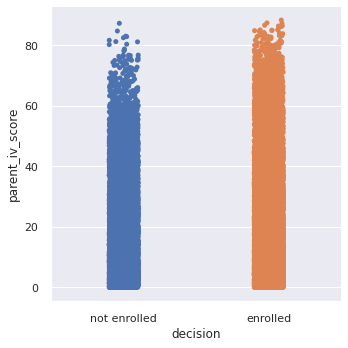

In [ ]:
sns.catplot(x="decision", y="parent_iv_score", data=df)


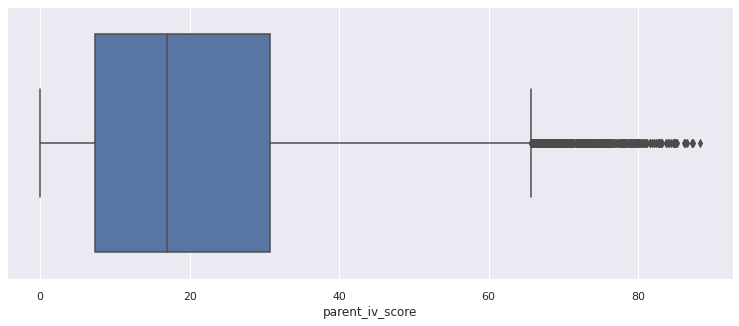

In [ ]:
ax = sns.boxplot(x=df['parent_iv_score'])

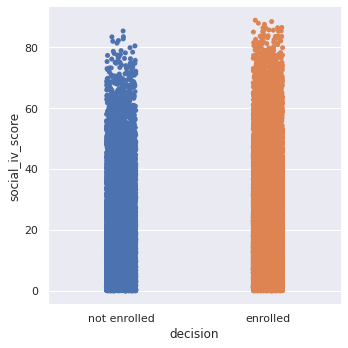

In [ ]:
sns.catplot(x="decision", y="social_iv_score", data=df)

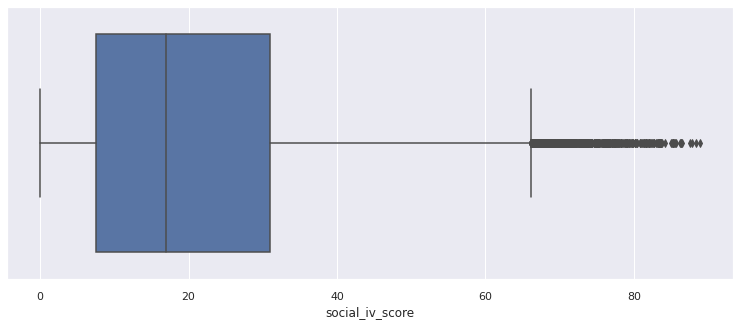

In [ ]:
ax = sns.boxplot(x=df['social_iv_score'])

In [ ]:
colors = {'not enrolled':'red', 'enrolled':'green'}


#ax.scatter(df['population'], df['Area'], c=df['continent'].map(colors))


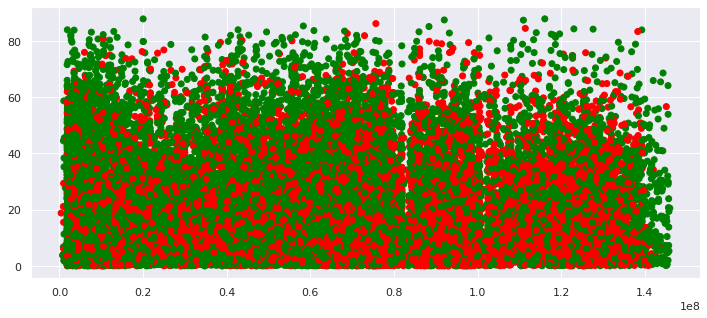

In [ ]:
plt.scatter(x=df['app_id'] , y=df['mental_iv_score'] , c=df['decision'].map(colors))

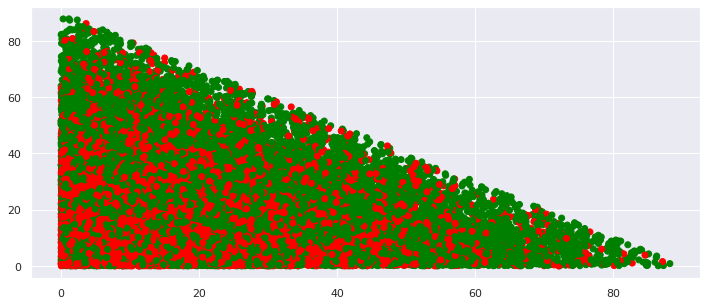

In [ ]:
plt.scatter(x=df['parent_iv_score'] , y=df['mental_iv_score'] ,  c=df['decision'].map(colors) )

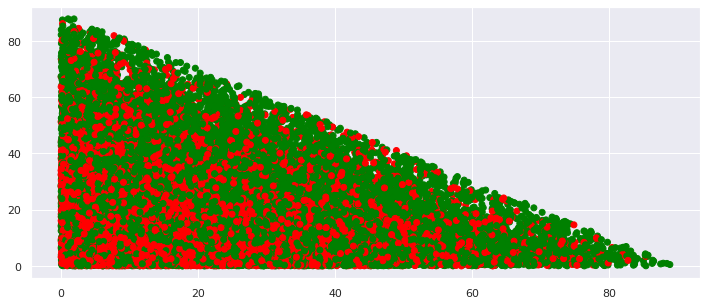

In [ ]:
plt.scatter(x=df['social_iv_score'] , y=df['mental_iv_score'] ,  c=df['decision'].map(colors) )

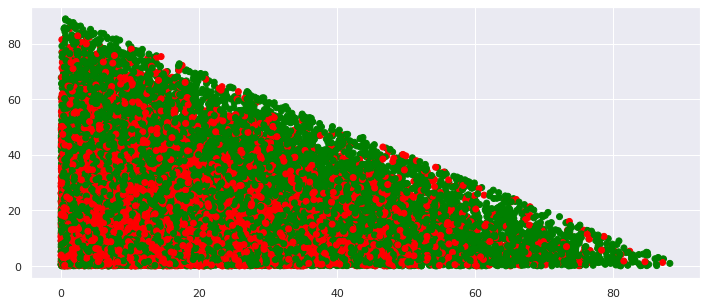

In [ ]:
plt.scatter(x=df['parent_iv_score'] , y=df['social_iv_score'] ,  c=df['decision'].map(colors) )

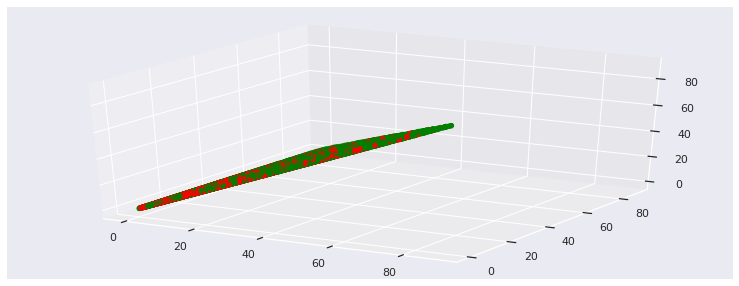

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['social_iv_score'] , df['mental_iv_score'] ,  df['social_iv_score'] , c=df['decision'].map(colors) )

Upon plotting the scatter plots we concluded that there's no direct relation between the variable. More interestingly, we found out that there exists an upper bound to the 3 scores, which we found out to be equal to ~90 as shown in the plots below.

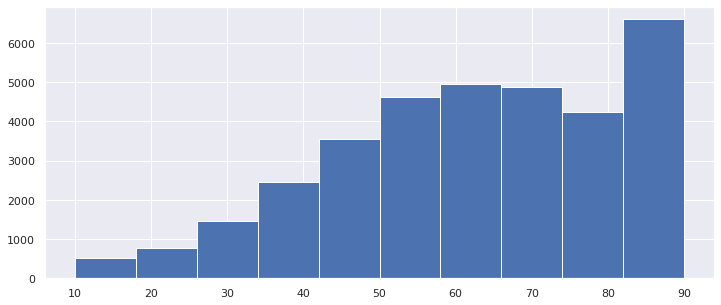

In [ ]:
(df['mental_iv_score']+df['parent_iv_score']+df['social_iv_score']).hist()

In [ ]:
(df['mental_iv_score']+df['parent_iv_score']+df['social_iv_score']).max()

90.00000000000004

In [ ]:
(df['mental_iv_score']+df['parent_iv_score']).max()

89.98255676328213

In [ ]:
(df['mental_iv_score']+df['social_iv_score']).max()

89.99565439470574

In [ ]:
(df['parent_iv_score']+df['social_iv_score']).max()

89.99784097527458

We also tried to find if there exists a linear correlation between the scores.

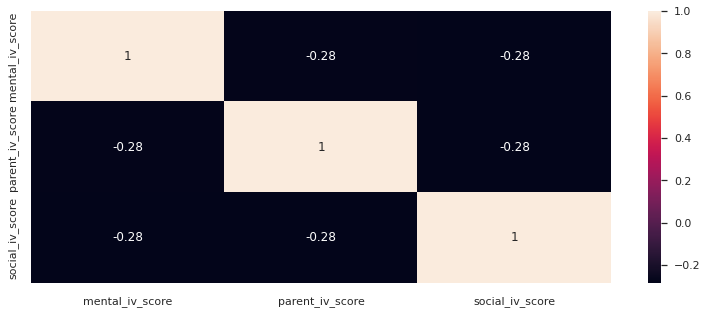

In [ ]:
scores=['mental_iv_score' , 'parent_iv_score' , 'social_iv_score']
df_scores = df[scores]
correlation_mat = df_scores.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()


From the heatmap, we can conclude that the scores are inversely related to each others.

# Feature Engineering


## Merging Spouses Incomes

Instead of incorporating each of the parents' salaries independantly, we though of merging them to have a new feature representing the total salary of the family. Additionally, we added an extra feature that represent the total salary per child by dividing the total salary/#(children in the family + 1), which can give an indication about the share of each child in the family in the parents' salaries.

In [ ]:
df['spouse_income']=df['spouse_income'].fillna(0)
df['spouse_fees/income']= df['spouse_fees/income'].fillna(0)
df['spouse_income_verification']= df['spouse_income_verification'].fillna('NV')

In [ ]:
df['total_income'] = df['spouse_income']+df['annual_salary']
df['total_income_per_child'] = df['total_income']/ (df['num_children']+1)


For the verification columns, and since we merged both parents salaries, we made a new column to serve as some sort of an interactive variable between the two verification columns of both parents, as shown in the code according to the following conditions.

In [ ]:
#reference: https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

def salaries_verification(row):
    if (row['salary_verification'] == 'V' and (row['spouse_income_verification'] =='V' or row['spouse_has_job']=='No')):
        val = 'V'
    elif (row['salary_verification'] == 'VbP' and (row['spouse_income_verification'] =='VbP' or row['spouse_has_job']=='No')):
        val = 'VbP'
    elif (row['salary_verification'] == 'NV' and (row['spouse_income_verification'] =='NV' or row['spouse_has_job']=='No')):
        val = 'NV'
    else:
        val = 'Partial Verification'
    return val

In [ ]:
# create a new column and use np.select to assign values to it using our lists as arguments
df['total_verification'] = df.apply(salaries_verification, axis=1)

# display updated DataFrame
df.head()

,app_id,job_name,job_exp_yrs,address,house_type,annual_salary,salary_verification,n_semesters,prev_grade_percent,year,fees/income,down_pymnt,fees,spouse_has_job,total_balance,payment_method,num_children,credit_limit,credit_limit_ex_mort,spouse_income,spouse_fees/income,spouse_income_verification,decision,mental_iv_score,parent_iv_score,social_iv_score,total_income,total_income_per_child,total_verification
0,126229306,Assistant,1.0,YUU,rental,46000.0,V,1,92.65,2017,17.48,0.0,40000.0,Yes,35198.0,credit,3,68039.0,35198.0,110750.0,27.97,V,not enrolled,0.087638,8.423544,32.629941,156750.0,39187.500000,V
1,76692947,Nurse,1.0,YUU,rental,152000.0,V,1,93.51,2016,2.39,16000.0,20000.0,No,11704.0,credit,5,24000.0,11704.0,0.0,0.00,NV,enrolled,25.328459,12.940269,21.888056,152000.0,25333.333333,V
2,60624620,engineer,5.0,NXT,rental,115000.0,V,2,88.47,2015,12.95,16000.0,20000.0,No,41004.0,credit,5,67122.0,41004.0,0.0,0.00,NV,enrolled,7.141356,7.539012,20.730058,115000.0,19166.666667,V
3,129161039,manager,2.0,YDC,rental,25000.0,NV,1,89.58,2018,9.75,0.0,20000.0,No,4065.0,credit,2,12000.0,4065.0,0.0,0.00,NV,not enrolled,34.474615,22.732014,1.076913,25000.0,8333.333333,NV
4,90518461,Other,6.0,LJM,mortgage,80000.0,V,1,78.51,2016,15.17,21960.0,27450.0,No,169079.0,credit,2,211158.0,32595.0,0.0,0.00,NV,enrolled,29.070282,5.226745,13.420388,80000.0,26666.666667,V


In [ ]:
df['total_verification'].value_counts()

VbP                     15482
V                       13233
NV                       4887
Partial Verification      398
Name: total_verification, dtype: int64

## Clustering Job Titles

We also believed that the job name information shall be of high value, especially given that it can give an indication about the social class of the family. Instead of using the whole ~80 categories, we decided to semantically group similar professions based on our judgement as a team, as shown in the code below.



In [ ]:
df.loc[(df.job_name == 'Advocate'),'job_name']='Consultant'
df.loc[(df.job_name == 'police'),'job_name']='Officer'

df.loc[(df.job_name == 'Developer'),'job_name']='Tech'
df.loc[(df.job_name == 'Tester'),'job_name']='Tech'
df.loc[(df.job_name == 'programmer'),'job_name']='Tech'

df.loc[(df.job_name == 'instructor'),'job_name']='teacher'
df.loc[(df.job_name == 'Trainer'),'job_name']='teacher'

df.loc[(df.job_name == 'Auditor'),'job_name']='accountant'

df.loc[(df.job_name == 'doctor'),'job_name']='Medical'
df.loc[(df.job_name == 'dentist'),'job_name']='Medical'
df.loc[(df.job_name == 'Dental'),'job_name']='Medical'
df.loc[(df.job_name == 'surgeon'),'job_name']='Medical'

df.loc[(df.job_name == 'designer'),'job_name']='Artist'
df.loc[(df.job_name == 'photographer'),'job_name']='Artist'
df.loc[(df.job_name == 'musician'),'job_name']='Artist'

df.loc[(df.job_name == 'electrician'),'job_name']='Worker'
df.loc[(df.job_name == 'Carpenter'),'job_name']='Worker'
df.loc[(df.job_name == 'WELDER'),'job_name']='Worker'
df.loc[(df.job_name == 'repairman'),'job_name']='Worker'

df.loc[(df.job_name == 'baker'),'job_name']='Chef'
df.loc[(df.job_name == 'Call Center'),'job_name']='Customer Service'
df.loc[(df.job_name == 'biologist'),'job_name']='scientist'
df.loc[(df.job_name == 'detective'),'job_name']='Investigator'
df.loc[(df.job_name == 'businessman'),'job_name']='commercial'
df.loc[(df.job_name == 'Recuter'),'job_name']='Human Resources'
df.loc[(df.job_name == 'Helpdesk'),'job_name']='reception'
df.loc[(df.job_name == 'Interpreter'),'job_name']='translator'
df.loc[(df.job_name == 'cleaner'),'job_name']='house keeping'
df.loc[(df.job_name == 'Navy'),'job_name']='Army'

In [ ]:
df['job_name'].value_counts()

manager             6285
Other               3960
Director            1740
engineer            1518
sales               1258
Owner               1075
Tech                1072
Analyst              989
driver               887
President            774
Officer              773
Nurse                745
Supervisor           725
Specialist           606
Consultant           570
teacher              565
Assistant            554
Technician           521
Administrator        413
Finance              400
Operator             396
Lead                 375
accountant           370
Medical              355
Coordinator          353
Court                310
Associate            286
Worker               278
Bank                 215
Mechanic             211
Marketing            200
Artist               179
therapist            156
Chef                 151
Customer Service      99
scientist             98
pharmacist            76
commercial            72
University            62
Investigator          60


Now, the job name categories are decreased to 53 categories compared to 80.   

## Categorical Data One-Hot Encoding

Now, let's transform the needed categorical variables, namely house type, job name, and salary verification to one-hot encoded variables to be prepared for the classication model.

In [ ]:
house_type = pd.get_dummies(df['house_type'], prefix='houseType')


In [ ]:
house_type.head()

,houseType_mortgage,houseType_owned,houseType_rental
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [ ]:
salaryVerification = pd.get_dummies(df['salary_verification'], prefix='salaryVerification')

In [ ]:
salaryVerification.head()

,salaryVerification_NV,salaryVerification_V,salaryVerification_VbP
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [ ]:
df['salaryVerification_V'] = salaryVerification['salaryVerification_V']
df['salaryVerification_VbP'] = salaryVerification['salaryVerification_VbP']

In [ ]:
total_verification = pd.get_dummies(df['total_verification'], prefix='TotalVerification')

In [ ]:
total_verification.head()

,TotalVerification_NV,TotalVerification_Partial Verification,TotalVerification_V,TotalVerification_VbP
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [ ]:
df['houseType_owned'] = house_type['houseType_owned']
df['houseType_rental'] = house_type['houseType_rental']

In [ ]:
df['TotalVerification_V'] = total_verification['TotalVerification_V']
df['TotalVerification_VbP'] = total_verification['TotalVerification_VbP']
df['TotalVerification_NV'] = total_verification['TotalVerification_NV']

In [ ]:
Job_name = pd.get_dummies(df['job_name'], prefix='jobName')


In [ ]:
Job_name.head()

,jobName_Administrator,jobName_Analyst,jobName_Army,jobName_Artist,jobName_Assistant,jobName_Associate,jobName_Bank,jobName_Biller,jobName_CASHIER,jobName_Captain,jobName_Chef,jobName_Consultant,jobName_Coordinator,jobName_Court,jobName_Customer Service,jobName_Director,jobName_Finance,jobName_Firefighter,jobName_Human Resources,jobName_Investigator,jobName_Lead,jobName_Logistics,jobName_Marketing,jobName_Mechanic,jobName_Medical,jobName_Nurse,jobName_Officer,jobName_Operator,jobName_Other,jobName_Owner,jobName_President,jobName_Specialist,jobName_Supervisor,jobName_Tech,jobName_Technician,jobName_University,jobName_Worker,jobName_accountant,jobName_commercial,jobName_contractor,jobName_driver,jobName_engineer,jobName_house keeping,jobName_lawyer,jobName_loader,jobName_manager,jobName_pharmacist,jobName_reception,jobName_sales,jobName_scientist,jobName_teacher,jobName_therapist,jobName_translator
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df, Job_name] , axis=1 )

In [ ]:
Job_columns = list(Job_name.columns)
Job_columns = Job_columns[:-1]

In [ ]:
print(Job_columns)

['jobName_Administrator', 'jobName_Analyst', 'jobName_Army', 'jobName_Artist', 'jobName_Assistant', 'jobName_Associate', 'jobName_Bank', 'jobName_Biller', 'jobName_CASHIER', 'jobName_Captain', 'jobName_Chef', 'jobName_Consultant', 'jobName_Coordinator', 'jobName_Court', 'jobName_Customer Service', 'jobName_Director', 'jobName_Finance', 'jobName_Firefighter', 'jobName_Human Resources', 'jobName_Investigator', 'jobName_Lead', 'jobName_Logistics', 'jobName_Marketing', 'jobName_Mechanic', 'jobName_Medical', 'jobName_Nurse', 'jobName_Officer', 'jobName_Operator', 'jobName_Other', 'jobName_Owner', 'jobName_President', 'jobName_Specialist', 'jobName_Supervisor', 'jobName_Tech', 'jobName_Technician', 'jobName_University', 'jobName_Worker', 'jobName_accountant', 'jobName_commercial', 'jobName_contractor', 'jobName_driver', 'jobName_engineer', 'jobName_house keeping', 'jobName_lawyer', 'jobName_loader', 'jobName_manager', 'jobName_pharmacist', 'jobName_reception', 'jobName_sales', 'jobName_scien

In [ ]:
df.head()

,app_id,job_name,job_exp_yrs,address,house_type,annual_salary,salary_verification,n_semesters,prev_grade_percent,year,fees/income,down_pymnt,fees,spouse_has_job,total_balance,payment_method,num_children,credit_limit,credit_limit_ex_mort,spouse_income,spouse_fees/income,spouse_income_verification,decision,mental_iv_score,parent_iv_score,social_iv_score,total_income,total_income_per_child,total_verification,houseType_owned,houseType_rental,TotalVerification_V,TotalVerification_VbP,TotalVerification_NV,jobName_Administrator,jobName_Analyst,jobName_Army,jobName_Artist,jobName_Assistant,jobName_Associate,jobName_Bank,jobName_Biller,jobName_CASHIER,jobName_Captain,jobName_Chef,jobName_Consultant,jobName_Coordinator,jobName_Court,jobName_Customer Service,jobName_Director,jobName_Finance,jobName_Firefighter,jobName_Human Resources,jobName_Investigator,jobName_Lead,jobName_Logistics,jobName_Marketing,jobName_Mechanic,jobName_Medical,jobName_Nurse,jobName_Officer,jobName_Operator,jobName_Other,jobName_Owner,jobName_President,jobName_Specialist,jobName_Supervisor,jobName_Tech,jobName_Technician,jobName_University,jobName_Worker,jobName_accountant,jobName_commercial,jobName_contractor,jobName_driver,jobName_engineer,jobName_house keeping,jobName_lawyer,jobName_loader,jobName_manager,jobName_pharmacist,jobName_reception,jobName_sales,jobName_scientist,jobName_teacher,jobName_therapist,jobName_translator
0,126229306,Assistant,1.0,YUU,rental,46000.0,V,1,92.65,2017,17.48,0.0,40000.0,Yes,35198.0,credit,3,68039.0,35198.0,110750.0,27.97,V,not enrolled,0.087638,8.423544,32.629941,156750.0,39187.500000,V,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76692947,Nurse,1.0,YUU,rental,152000.0,V,1,93.51,2016,2.39,16000.0,20000.0,No,11704.0,credit,5,24000.0,11704.0,0.0,0.00,NV,enrolled,25.328459,12.940269,21.888056,152000.0,25333.333333,V,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60624620,engineer,5.0,NXT,rental,115000.0,V,2,88.47,2015,12.95,16000.0,20000.0,No,41004.0,credit,5,67122.0,41004.0,0.0,0.00,NV,enrolled,7.141356,7.539012,20.730058,115000.0,19166.666667,V,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,129161039,manager,2.0,YDC,rental,25000.0,NV,1,89.58,2018,9.75,0.0,20000.0,No,4065.0,credit,2,12000.0,4065.0,0.0,0.00,NV,not enrolled,34.474615,22.732014,1.076913,25000.0,8333.333333,NV,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,90518461,Other,6.0,LJM,mortgage,80000.0,V,1,78.51,2016,15.17,21960.0,27450.0,No,169079.0,credit,2,211158.0,32595.0,0.0,0.00,NV,enrolled,29.070282,5.226745,13.420388,80000.0,26666.666667,V,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(['jobName_translator'] , axis=1 )

In [ ]:
df_modified = df[df['fees/income'].notnull()]
df_modified[df_modified['fees/income'].isna()]

,app_id,job_name,job_exp_yrs,address,house_type,annual_salary,salary_verification,n_semesters,prev_grade_percent,year,fees/income,down_pymnt,fees,spouse_has_job,total_balance,payment_method,num_children,credit_limit,credit_limit_ex_mort,spouse_income,spouse_fees/income,spouse_income_verification,decision,mental_iv_score,parent_iv_score,social_iv_score,total_income,total_income_per_child,total_verification,houseType_owned,houseType_rental,TotalVerification_V,TotalVerification_VbP,TotalVerification_NV,jobName_Administrator,jobName_Analyst,jobName_Army,jobName_Artist,jobName_Assistant,jobName_Associate,jobName_Bank,jobName_Biller,jobName_CASHIER,jobName_Captain,jobName_Chef,jobName_Consultant,jobName_Coordinator,jobName_Court,jobName_Customer Service,jobName_Director,jobName_Finance,jobName_Firefighter,jobName_Human Resources,jobName_Investigator,jobName_Lead,jobName_Logistics,jobName_Marketing,jobName_Mechanic,jobName_Medical,jobName_Nurse,jobName_Officer,jobName_Operator,jobName_Other,jobName_Owner,jobName_President,jobName_Specialist,jobName_Supervisor,jobName_Tech,jobName_Technician,jobName_University,jobName_Worker,jobName_accountant,jobName_commercial,jobName_contractor,jobName_driver,jobName_engineer,jobName_house keeping,jobName_lawyer,jobName_loader,jobName_manager,jobName_pharmacist,jobName_reception,jobName_sales,jobName_scientist,jobName_teacher,jobName_therapist,salaryVerification_V,salaryVerification_VbP


In [ ]:
df_modified.head()

,app_id,job_name,job_exp_yrs,address,house_type,annual_salary,salary_verification,n_semesters,prev_grade_percent,year,fees/income,down_pymnt,fees,spouse_has_job,total_balance,payment_method,num_children,credit_limit,credit_limit_ex_mort,spouse_income,spouse_fees/income,spouse_income_verification,decision,mental_iv_score,parent_iv_score,social_iv_score,total_income,total_income_per_child,total_verification,houseType_owned,houseType_rental,TotalVerification_V,TotalVerification_VbP,TotalVerification_NV,jobName_Administrator,jobName_Analyst,jobName_Army,jobName_Artist,jobName_Assistant,jobName_Associate,jobName_Bank,jobName_Biller,jobName_CASHIER,jobName_Captain,jobName_Chef,jobName_Consultant,jobName_Coordinator,jobName_Court,jobName_Customer Service,jobName_Director,jobName_Finance,jobName_Firefighter,jobName_Human Resources,jobName_Investigator,jobName_Lead,jobName_Logistics,jobName_Marketing,jobName_Mechanic,jobName_Medical,jobName_Nurse,jobName_Officer,jobName_Operator,jobName_Other,jobName_Owner,jobName_President,jobName_Specialist,jobName_Supervisor,jobName_Tech,jobName_Technician,jobName_University,jobName_Worker,jobName_accountant,jobName_commercial,jobName_contractor,jobName_driver,jobName_engineer,jobName_house keeping,jobName_lawyer,jobName_loader,jobName_manager,jobName_pharmacist,jobName_reception,jobName_sales,jobName_scientist,jobName_teacher,jobName_therapist
0,126229306,Assistant,1.0,YUU,rental,46000.0,V,1,92.65,2017,17.48,0.0,40000.0,Yes,35198.0,credit,3,68039.0,35198.0,110750.0,27.97,V,not enrolled,0.087638,8.423544,32.629941,156750.0,39187.500000,V,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76692947,Nurse,1.0,YUU,rental,152000.0,V,1,93.51,2016,2.39,16000.0,20000.0,No,11704.0,credit,5,24000.0,11704.0,0.0,0.00,NV,enrolled,25.328459,12.940269,21.888056,152000.0,25333.333333,V,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60624620,engineer,5.0,NXT,rental,115000.0,V,2,88.47,2015,12.95,16000.0,20000.0,No,41004.0,credit,5,67122.0,41004.0,0.0,0.00,NV,enrolled,7.141356,7.539012,20.730058,115000.0,19166.666667,V,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,129161039,manager,2.0,YDC,rental,25000.0,NV,1,89.58,2018,9.75,0.0,20000.0,No,4065.0,credit,2,12000.0,4065.0,0.0,0.00,NV,not enrolled,34.474615,22.732014,1.076913,25000.0,8333.333333,NV,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,90518461,Other,6.0,LJM,mortgage,80000.0,V,1,78.51,2016,15.17,21960.0,27450.0,No,169079.0,credit,2,211158.0,32595.0,0.0,0.00,NV,enrolled,29.070282,5.226745,13.420388,80000.0,26666.666667,V,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Predictive Analytics

To define the most contributing factors, we ran multiple experiments to learn more about the importance of each feature we believe might be of high value.

## Decision Tree  

The very first experiment.

In [ ]:
from sklearn import tree

#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, Y)

In [ ]:
#df_model = df.copy()
df_model = df_modified.copy()

In [ ]:
df.columns

Index(['app_id', 'job_name', 'job_exp_yrs', 'address', 'house_type',
       'annual_salary', 'salary_verification', 'n_semesters',
       'prev_grade_percent', 'year', 'fees/income', 'down_pymnt', 'fees',
       'spouse_has_job', 'total_balance', 'payment_method', 'num_children',
       'credit_limit', 'credit_limit_ex_mort', 'spouse_income',
       'spouse_fees/income', 'spouse_income_verification', 'decision',
       'mental_iv_score', 'parent_iv_score', 'social_iv_score',
       'decision_encoded', 'total_income', 'total_income_per_child'],
      dtype='object')

In [ ]:
scores = ['mental_iv_score', 'parent_iv_score', 'social_iv_score' , 'prev_grade_percent']
X =  df_model[scores]
Y= df_model['decision_encoded']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
decision = df_model['decision']
y = label_encoder.fit_transform(decision)
df_model['decision_encoded'] = y



In [ ]:
df_model.head()

,app_id,job_name,job_exp_yrs,address,house_type,annual_salary,salary_verification,n_semesters,prev_grade_percent,year,fees/income,down_pymnt,fees,spouse_has_job,total_balance,payment_method,num_children,credit_limit,credit_limit_ex_mort,spouse_income,spouse_fees/income,spouse_income_verification,decision,mental_iv_score,parent_iv_score,social_iv_score,decision_encoded
0,126229306,Assistant,1.0,YUU,rental,46000.0,V,1,92.65,2017,17.48,0.0,40000.0,Yes,35198.0,credit,3,68039.0,35198.0,110750.0,27.97,V,not enrolled,0.087638,8.423544,32.629941,1
1,76692947,Nurse,1.0,YUU,rental,152000.0,V,1,93.51,2016,2.39,16000.0,20000.0,No,11704.0,credit,5,24000.0,11704.0,NaN,NaN,NaN,enrolled,25.328459,12.940269,21.888056,0
2,60624620,engineer,5.0,NXT,rental,115000.0,V,2,88.47,2015,12.95,16000.0,20000.0,No,41004.0,credit,5,67122.0,41004.0,NaN,NaN,NaN,enrolled,7.141356,7.539012,20.730058,0
3,129161039,manager,2.0,YDC,rental,25000.0,NV,1,89.58,2018,9.75,0.0,20000.0,No,4065.0,credit,2,12000.0,4065.0,NaN,NaN,NaN,not enrolled,34.474615,22.732014,1.076913,1
4,90518461,Other,6.0,LJM,mortgage,80000.0,V,1,78.51,2016,15.17,21960.0,27450.0,No,169079.0,credit,2,211158.0,32595.0,NaN,NaN,NaN,enrolled,29.070282,5.226745,13.420388,0


In [ ]:
#tree.plot_tree(clf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(  X, Y, test_size=0.33, random_state=42)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_predit = clf.predict(X_test)

In [ ]:
print(sum(y_predit == y_test) / len(y_test) * 100 )

61.639928698752236


--> Not so bad accuracy!

In [ ]:
from yellowbrick.model_selection import FeatureImportances

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d5a65a290>,
                   estimator=DecisionTreeClassifier())

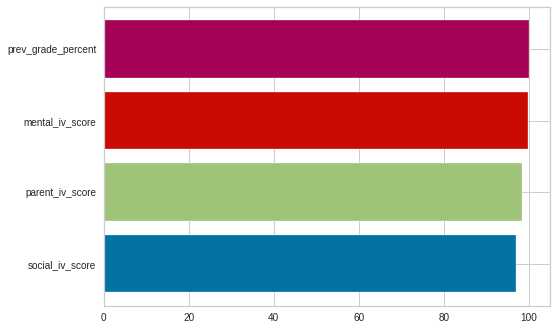

In [ ]:
viz = FeatureImportances(clf)
viz.fit(X_train, y_train)

## Random Forest Classification 

> we depended on the random forest classifier as our main model to assess the feature importance for classification.



Random forest classifier was suitable in this problem due to the following reasons:


1.   It is robust against outliers 
2.   It has better accuracy than working with a single decision tree emperically and theoretically. 





In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_random = RandomForestClassifier(max_depth=10, random_state=0)

In the cell below, we show the feature importance based on our final experiment that the test_dataSet was assessed on. 

RandomForestClassifier(max_depth=10, random_state=0)

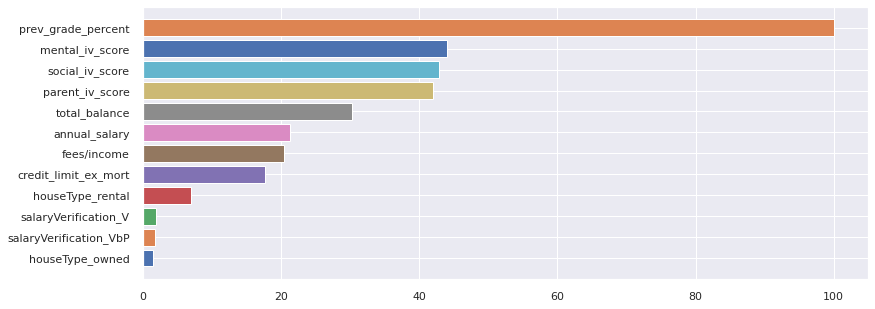

In [ ]:
viz = FeatureImportances(clf_random)
viz.fit(X_train, y_train)
clf_random.fit(X_train, y_train)

In [ ]:
y_predit = clf_random.predict(X_test)

In [ ]:
print(sum(y_predit == y_test) / len(y_test) * 100 )

70.63235294117646


### Experimenting with more Variables

In each experiment, we added a comment for the used features and the reported accuracy. 

In [ ]:
#scores = ['mental_iv_score', 'parent_iv_score', 'social_iv_score' , 'prev_grade_percent' , 'annual_salary' , 'total_balance' , 'fees/income' , 'credit_limit_ex_mort' , 'credit_limit']  # 70.008%
#scores = [ 'prev_grade_percent' , 'mental_iv_score', 'parent_iv_score', 'social_iv_score'  ]
#scores = ['houseType_rental' , 'houseType_owned' , 'prev_grade_percent' , 'mental_iv_score', 'parent_iv_score', 'social_iv_score' ,  'annual_salary' , 'total_balance' , 'credit_limit_ex_mort'  , 'fees/income'] # 70.169%
#scores = ['prev_grade_percent' , 'annual_salary' , 'total_balance' ]

#scores = ['houseType_rental' , 'houseType_owned' , 'prev_grade_percent' , 'mental_iv_score', 'parent_iv_score', 'social_iv_score' ,  'annual_salary' , 'total_balance' , 'credit_limit_ex_mort'  , 'fees/income' , 'salaryVerification_V' , 'salaryVerification_VbP']

#scores = ['houseType_rental' , 'houseType_owned' , 'prev_grade_percent' , 'mental_iv_score', 'parent_iv_score', 'social_iv_score' ,  'total_balance' , 'credit_limit_ex_mort'  , 'fees/income' ]
#scores=["spouse_income" , "spouse_fees/income"] + scores # 70.124 % 
#Totals = ['total_income' , 'total_income_per_child' , 'TotalVerification_VbP' , 'TotalVerification_V' , 'TotalVerification_NV' ]
#scores = scores + Job_columns + Totals # 70.142 %
#scores = scores + Totals  # 70.169 % 
X =  df_model[scores]
Y= df_model['decision_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(  X, Y, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,spouse_income,spouse_fees/income,houseType_rental,houseType_owned,prev_grade_percent,mental_iv_score,parent_iv_score,social_iv_score,total_balance,credit_limit_ex_mort,fees/income,total_income,total_income_per_child,TotalVerification_VbP,TotalVerification_V,TotalVerification_NV
13731,0.0,0.0,1,0,90.01,11.007882,6.674356,14.954460,25029.0,25029.0,8.05,95000.0,47500.000000,1,0,0
27875,0.0,0.0,1,0,83.45,3.298452,3.139874,22.855498,22470.0,22470.0,14.98,61224.0,10204.000000,1,0,0
5071,0.0,0.0,0,0,82.73,69.211984,13.911241,6.876775,31358.0,31358.0,14.54,95000.0,15833.333333,1,0,0
6127,0.0,0.0,1,0,91.61,33.095608,29.025998,10.747754,59041.0,59041.0,22.37,93000.0,15500.000000,1,0,0
3223,0.0,0.0,0,0,87.01,4.275967,29.659297,9.591423,122909.0,13420.0,4.45,200000.0,40000.000000,1,0,0


In [ ]:
clf_random = RandomForestClassifier(max_depth=15, random_state=0)

In [ ]:
viz = FeatureImportances(clf_random)
#viz.fit(X_train, y_train)
clf_random.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=0)

In [ ]:
y_predit = clf_random.predict(X_test)

In [ ]:
print(sum(y_predit == y_test) / len(y_test) * 100 )

70.29411764705881


## SVM

SVMs are our next go-to classification model to check if we can have linear support vectors that are able to classify the data according to the response variable. 

In [ ]:
from sklearn import svm

In [ ]:
clf_svm = svm.SVC()


In [ ]:
# scores = ['houseType_rental' , 'houseType_owned' , 'prev_grade_percent' , 'mental_iv_score', 'parent_iv_score', 'social_iv_score' ,  'annual_salary' , 'total_balance' , 'credit_limit_ex_mort'  , 'fees/income'] # 59.7%

In [ ]:
#viz = FeatureImportances(clf_svm)
#viz.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)

SVC()

In [ ]:
y_predit = clf_svm.predict(X_test)

In [ ]:
print(sum(y_predit == y_test) / len(y_test) * 100 )

59.786096256684495


> Not so good accuracy!

## Non Linear SVM

Hence, we decided to experiment to non-linear SVM kernels.

In [ ]:
clf_NUsvm = svm.NuSVC(gamma="auto")

In [ ]:
# scores = ['houseType_rental' , 'houseType_owned' , 'prev_grade_percent' , 'mental_iv_score', 'parent_iv_score', 'social_iv_score' ,  'annual_salary' , 'total_balance' , 'credit_limit_ex_mort'  , 'fees/income'] # 58.930481283422466

In [ ]:
clf_NUsvm.fit(X_train, y_train)

NuSVC(gamma='auto')

In [ ]:
y_predit = clf_NUsvm.predict(X_test)

In [ ]:
print(sum(y_predit == y_test) / len(y_test) * 100 )

58.930481283422466


## Gradient Boosting Classifier 

Gradient Boosting classifier has the advantages of the random forest in addition to making use of the gradient boosting theory. 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# scores = ['houseType_rental' , 'houseType_owned' , 'prev_grade_percent' , 'mental_iv_score', 'parent_iv_score', 'social_iv_score' ,  'annual_salary' , 'total_balance' , 'credit_limit_ex_mort'  , 'fees/income'] # with 100 estimators , 1.05 lr , max_depth = 1 --> 0.710427807486631
scores = ['houseType_rental' , 'houseType_owned' , 'prev_grade_percent' , 'mental_iv_score', 'parent_iv_score', 'social_iv_score' ,  'annual_salary' , 'total_balance' , 'credit_limit_ex_mort'  , 'fees/income' , 'salaryVerification_V' , 'salaryVerification_VbP'] # # with 100 estimators , 1.05 lr , max_depth = 1 --> 0.7106060606060606
# scores=["spouse_income" , "spouse_fees/income"] + scores # 0.7089126559714795
# last totals = 70.98% 

In [ ]:
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.05,     
    max_depth=1, random_state=0).fit(X_train, y_train)
clf_GB.score(X_test, y_test)

0.7106060606060606

After some experimentation, it seemed to produce the best results !

## MLP Neural Network

> Finally, we decided to experimenting with deep learning models. we tried to assume the hyper parameters. However, we did not achieve good results that are close to the gradient boosting classifier or even the random forest classifier. 

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf_MLP = MLPClassifier(solver='adam', alpha=1e-5, learning_rate= 'adaptive' , 
                    hidden_layer_sizes=(2048, 2), random_state=1 , max_iter = 1000000)

clf_MLP.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2048, 2),
              learning_rate='adaptive', max_iter=1000000, random_state=1)

In [ ]:
y_predit = clf_MLP.predict(X_test)

In [ ]:
print(sum(y_predit == y_test) / len(y_test) * 100 )

58.930481283422466


# Final Chosen Model 

we trained the model on the whole dataset in this cell instead of separating the data to have 33% for testing. 

In [ ]:
# Gradient Boosting Classifier   
# Trained on the whole dataset
clf_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.05,     
    max_depth=1, random_state=0).fit(X, Y)
#clf_GB.score(X_test, y_test)

In [ ]:
clf_GB.score(X_test, y_test) # for sanity check 

0.7181818181818181

In [ ]:
problem_test = pd.read_csv("/content/drive/MyDrive/CSCE 4930 - Mohammed Abuelwafa - 900172603/Hackathon 2/test_International-School-Dataset.csv")

In [ ]:
problem_test.head()

,app_id,job_name,job_exp_yrs,address,house_type,annual_salary,salary_verification,n_semesters,prev_grade_percent,year,fees/income,down_pymnt,fees,spouse_has_job,total_balance,payment_method,num_children,credit_limit,credit_limit_ex_mort,spouse_income,spouse_fees/income,spouse_income_verification,decision,mental_iv_score,parent_iv_score,social_iv_score
0,22600619,manager,6.0,FOW,mortgage,80000.0,V,2,80.48,2014,12.49,0.0,20000.0,No,180643.0,credit,3,197427.0,28558.0,NaN,NaN,NaN,not enrolled,23.649193,5.165801,17.779308
1,3647199,Tech,8.0,EAE,mortgage,156000.0,V,1,93.97,2013,3.33,19200.0,24000.0,No,717111.0,credit,3,744266.0,97434.0,NaN,NaN,NaN,enrolled,19.830339,20.038635,6.336663
2,66293500,Consultant,2.0,XWV,rental,107000.0,VbP,1,84.59,2015,7.26,0.0,20000.0,No,30109.0,credit,3,47410.0,30109.0,NaN,NaN,NaN,not enrolled,1.339863,5.903078,9.462986
3,30132830,Nurse,9.0,EAE,mortgage,100000.0,V,2,85.51,2014,7.35,19200.0,24000.0,No,361935.0,credit,4,396600.0,27013.0,NaN,NaN,NaN,enrolled,21.294029,9.725985,44.028674
4,110206107,engineer,5.0,YMN,rental,300000.0,VbP,2,74.18,2017,10.38,0.0,20000.0,No,38835.0,credit,5,76600.0,38835.0,NaN,NaN,NaN,not enrolled,17.226434,30.801950,19.968482


we needed to do the same data preprocessing on the testing dataset before importing it to our predictive model. 

In [ ]:
# preprocess the test data for the final model 
house_type = pd.get_dummies(problem_test['house_type'], prefix='houseType')



In [ ]:
house_type.head()

,houseType_mortgage,houseType_owned,houseType_rental
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
problem_test['houseType_owned'] = house_type['houseType_owned']
problem_test['houseType_rental'] = house_type['houseType_rental']

In [ ]:
salaryVerification = pd.get_dummies(problem_test['salary_verification'], prefix='salaryVerification')

In [ ]:
salaryVerification.head()

,salaryVerification_NV,salaryVerification_V,salaryVerification_VbP
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [ ]:
problem_test['salaryVerification_V'] = salaryVerification['salaryVerification_V']
problem_test['salaryVerification_VbP'] = salaryVerification['salaryVerification_VbP']

In [ ]:
features = scores = ['houseType_rental' , 'houseType_owned' , 'prev_grade_percent' , 'mental_iv_score', 'parent_iv_score', 'social_iv_score' ,  'annual_salary' , 'total_balance' , 'credit_limit_ex_mort'  , 'fees/income' , 'salaryVerification_V' , 'salaryVerification_VbP']

Now, we have the testing dataset in the needed format. 

In [ ]:
problem_test_modified = problem_test[features]

In [ ]:
final_res = clf_GB.predict(problem_test_modified)

In [ ]:
final_res

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
problem_test.shape

(2000, 30)

In [ ]:
len(final_res)

2000

In [ ]:
# 1 -> not enrolled 
# 0 -> enrolled 
answers = {1:'not enrolled '  , 0:'enrolled'}
final_res_str = []
for item in final_res:
  final_res_str.append(answers[item])

we ran the predictive model on the testing data set and here is the outcome. 

In [ ]:
final_res_str

['not enrolled ',
 'enrolled',
 'not enrolled ',
 'enrolled',
 'not enrolled ',
 'enrolled',
 'not enrolled ',
 'enrolled',
 'enrolled',
 'not enrolled ',
 'not enrolled ',
 'enrolled',
 'not enrolled ',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'not enrolled ',
 'not enrolled ',
 'enrolled',
 'not enrolled ',
 'not enrolled ',
 'not enrolled ',
 'enrolled',
 'not enrolled ',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'not enrolled ',
 'enrolled',
 'enrolled',
 'not enrolled ',
 'enrolled',
 'not enrolled ',
 'enrolled',
 'enrolled',
 'enrolled',
 'not enrolled ',
 'not enrolled ',
 'not enrolled ',
 'not enrolled ',
 'not enrolled ',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'enrolled',
 'not enrolled ',
 'not enrolled ',
 'not enrolled ',
 'enrolled',
 'enrolled',
 'not enrolled ',
 'enrolled',
 'enrolled',
 'enrolled',
 'not enrolled ',
 'enrolled',

In [ ]:
len(final_res_str)

2000

In [ ]:
final_df = pd.DataFrame({'decision': final_res_str})

In [ ]:
final_df.head()

,decision
0,not enrolled
1,enrolled
2,not enrolled
3,enrolled
4,not enrolled


In [ ]:
#find accuracy 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
decision = problem_test['decision']
y = label_encoder.fit_transform(decision)
problem_test['decision_encoded'] = y

> Our accuracy against the testing dataset was **71.5%**

In [ ]:
y_pred = final_res 
y_true = problem_test['decision_encoded']
print(f'The accuracy is : {sum(y_pred == y_true) / len(y_true) * 100}')

The accuracy is : 71.05


we saved our results in a file named test_results.csv that can be found in the same hackathon folder. 

In [ ]:
final_df.to_csv("test_results.csv"  , index=False)

In [ ]:
!cp test_results.csv "/content/drive/MyDrive/CSCE 4930 - Mohammed Abuelwafa - 900172603/Hackathon 2/"

# Final Thoughts and Conclusions

Based on our descriptive analytics, our recommendation is that the school can use the following features instead to help make better decisions regarding the status of the applications:
* Student's Previous Grade (Given that it was by far the most important feature in the Random Forest Classifier)
* Parents' Total Salaries / #Children (while taking into account the level of verification for the given salaries)
* Mental, Social, and Parent IV Scores

Based on our predictive analysis, the most features that contributed to the classifier performance are the following: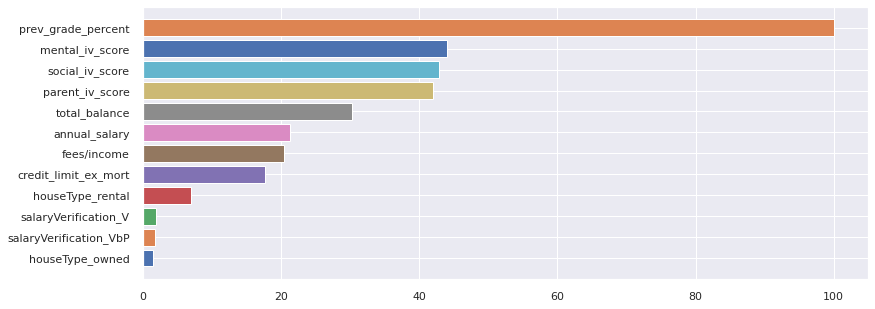

Instead of spenting time and effort on manual screeing, they can make use of our classification model that takes into account extra features, such as the job title, house type, and applicant's years of experience. More actionable recommendations shall be provided in the presentation.
